<a href="https://colab.research.google.com/github/gabrielbruno1999/GoogleColab/blob/main/Trabalho_em_Grupo_(dogecoin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho do Curso de Extensão

**Alunos:**
*Gabriel Bruno*,
*Marcilio Mozart*,
*Matheus Ferreira*

**Professor:** *Carlos Artur Guimarães*

1. Problemática:
Relatório sobre a criptomoeda Dogecoin, que surgiu como uma "moeda piada". Ainda assim, desenvolveu uma grande comunidade on-line, alcançando uma capitalização de US$ 60 milhões em janeiro de 2014. Pretendemos com essa pesquisa mostrar o histórico de seu crescimento em USD.

2. O que é:
Histórico de crescimento da Dogecoin de 2017 a 2021.

3. Fonte de Dados:
[kaggle](https://www.kaggle.com/tarandeep97/dogecoin-historical-data20172021)

4. ONU 2030 área e Objetivo:
Economia, Crescimento Econômico(8) & Inovação(9).

# 1_Obtenção dos dados

In [2]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as plt
import plotly.graph_objects as go

In [3]:
dogecoin = pd.read_csv("https://raw.githubusercontent.com/gabrielbruno1999/GoogleColab/main/Dogecoin%20Historical%20Data.csv")
dogecoin

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 07, 2021",0.573179,0.579819,0.598133,0.519357,14.72B,-1.15%
1,"May 06, 2021",0.579839,0.653501,0.663006,0.541526,12.97B,-11.52%
2,"May 05, 2021",0.655355,0.559521,0.693839,0.536232,28.03B,17.24%
3,"May 04, 2021",0.559005,0.438349,0.594039,0.398416,31.90B,27.56%
4,"May 03, 2021",0.438244,0.372467,0.443181,0.372467,9.97B,17.68%
...,...,...,...,...,...,...,...
1430,"Jun 07, 2017",0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
1431,"Jun 06, 2017",0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
1432,"Jun 05, 2017",0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
1433,"Jun 04, 2017",0.003770,0.003213,0.003770,0.002544,5.96M,17.34%


# 2_Scrub (Limpeza dos dados)

## Missingno

In [4]:
#missingno é uma biblioteca para testar os dados

!pip install missingno #instalação da biblioteca missingno
import missingno as msno # importação da biblioteca

# Para consultar mais informações sobre o missingno segue o tutorial https://github.com/ResidentMario/missingno

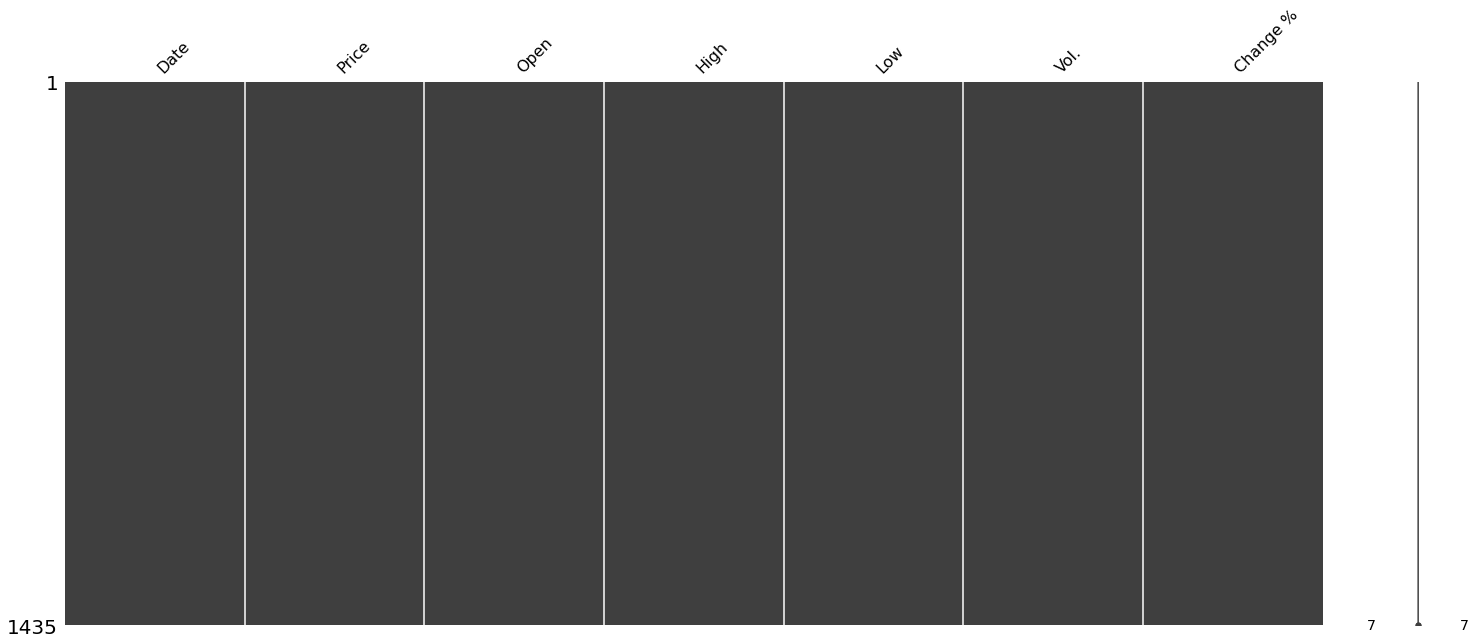

In [5]:
msno.matrix(dogecoin)

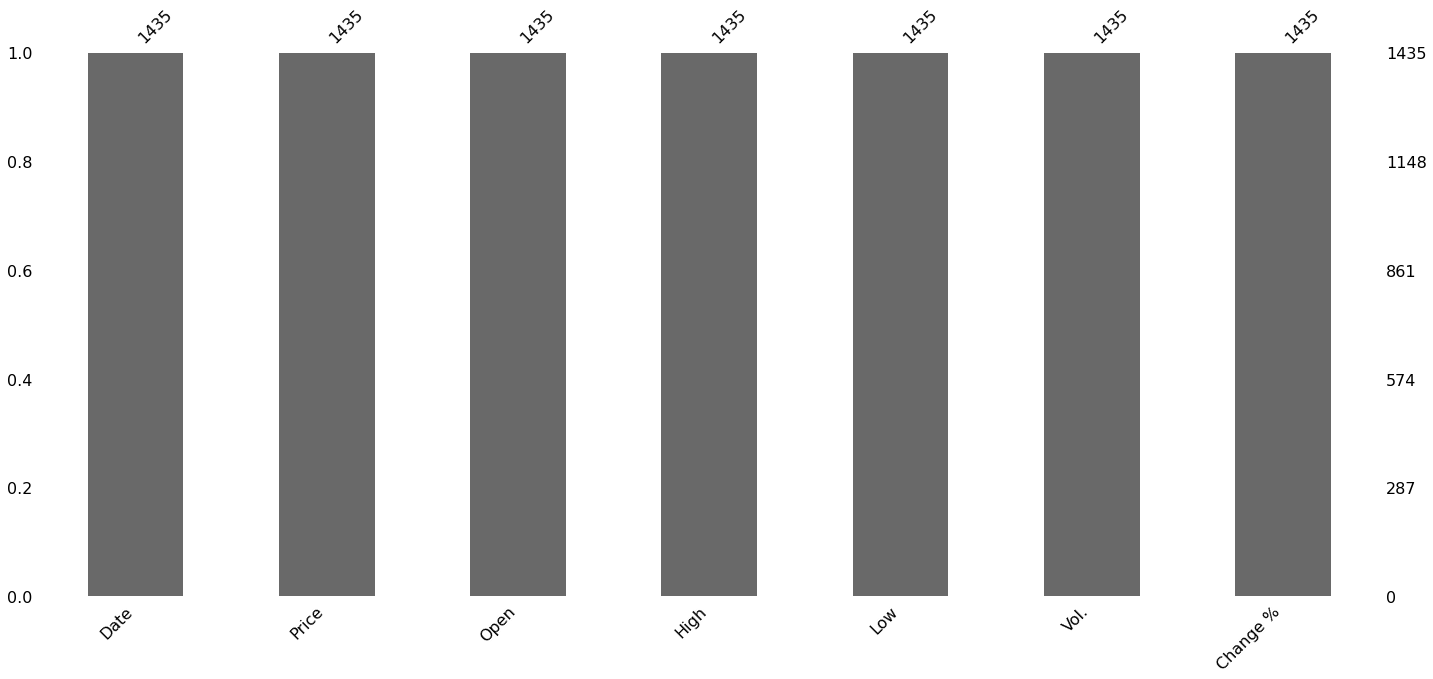

In [6]:
msno.bar(dogecoin)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



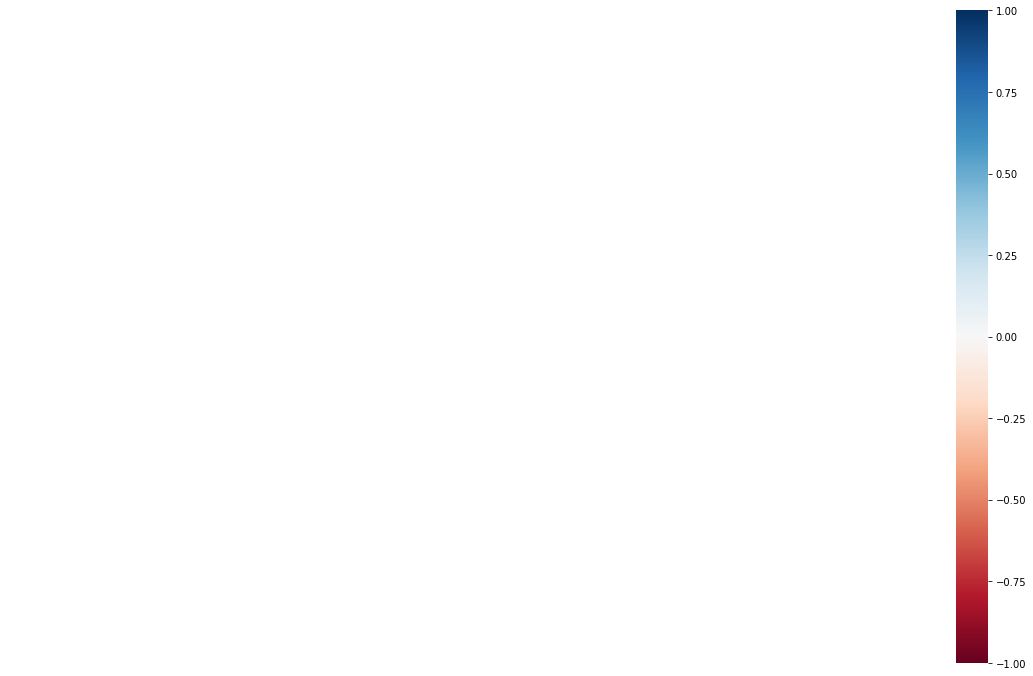

In [7]:
msno.heatmap(dogecoin)

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2837: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.



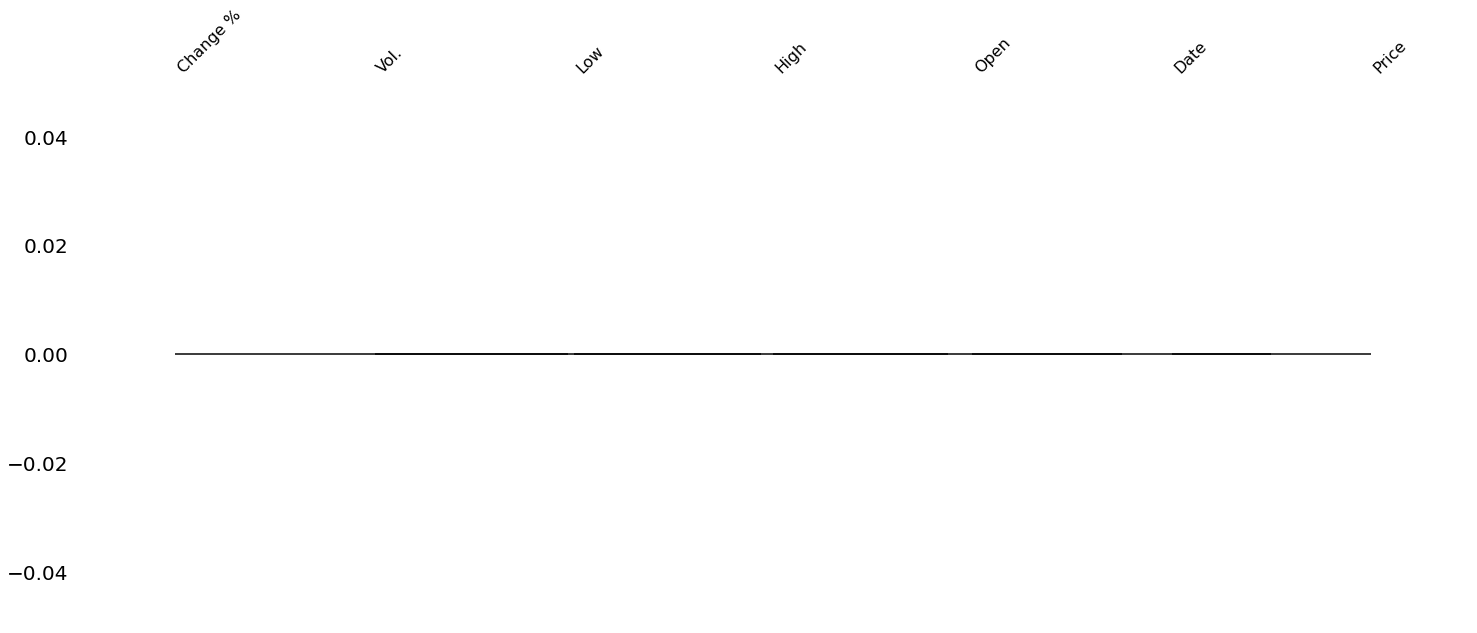

In [8]:
msno.dendrogram(dogecoin)

# 3_Exploração dos Dados

In [9]:
dogecoin.shape

(1435, 7)

In [10]:
dogecoin.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 07, 2021",0.573179,0.579819,0.598133,0.519357,14.72B,-1.15%
1,"May 06, 2021",0.579839,0.653501,0.663006,0.541526,12.97B,-11.52%
2,"May 05, 2021",0.655355,0.559521,0.693839,0.536232,28.03B,17.24%
3,"May 04, 2021",0.559005,0.438349,0.594039,0.398416,31.90B,27.56%
4,"May 03, 2021",0.438244,0.372467,0.443181,0.372467,9.97B,17.68%
5,"May 02, 2021",0.372404,0.390686,0.399246,0.363912,8.20B,-4.67%
6,"May 01, 2021",0.390642,0.336657,0.396647,0.327317,11.34B,16.04%
7,"Apr 30, 2021",0.336635,0.303226,0.338327,0.300761,6.48B,11.01%
8,"Apr 29, 2021",0.303240,0.323591,0.323797,0.295612,6.74B,-6.29%
9,"Apr 28, 2021",0.323582,0.270696,0.343505,0.255591,21.22B,19.55%


In [11]:
dogecoin.describe()

,Price,Open,High,Low
count,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.011895,0.011497,0.013001,0.010444
std,0.048844,0.046533,0.053560,0.041342
min,0.000774,0.000774,0.000793,0.000669
25%,0.002301,0.002301,0.002362,0.002212
50%,0.002746,0.002747,0.002836,0.002634
75%,0.003638,0.003634,0.003823,0.003451
max,0.655355,0.653501,0.693839,0.541526


In [12]:
dogecoin.corr()

,Price,Open,High,Low
Price,1.000000,0.977760,0.993084,0.987807
Open,0.977760,1.000000,0.982604,0.989810
High,0.993084,0.982604,1.000000,0.978617
Low,0.987807,0.989810,0.978617,1.000000


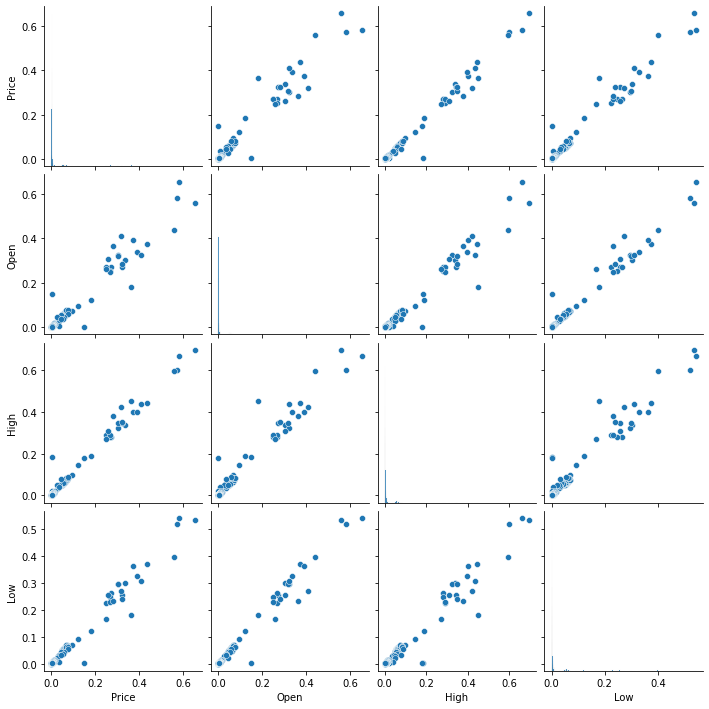

In [13]:
sns.pairplot(dogecoin)

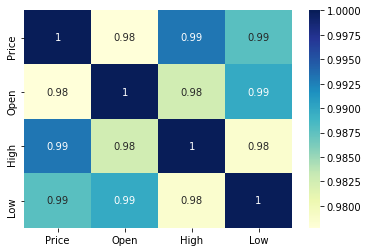

In [14]:
plot = sns.heatmap(dogecoin.corr(), cmap='YlGnBu', annot=True)

#4_Visualização dos Dados

In [15]:
#Converter a data apenas para o ano
dogecoin['ano'] = dogecoin['Date'].apply(lambda x : x[-4:]).astype(int)
#Preço médio anual
dogecoin.groupby('ano')['Price'].mean()

ano
2017    0.002272
2018    0.004350
2019    0.002576
2020    0.003135
2021    0.101671
Name: Price, dtype: float64

In [16]:
#Encontrando o maior preço
dogecoin[dogecoin['Price']==dogecoin['Price'].max()][['Date','Price']]

,Date,Price
2,"May 05, 2021",0.655355


In [17]:
#Encontrando o menor preço
dogecoin[dogecoin['Price']==dogecoin['Price'].min()][['Date','Price']]

,Date,Price
1323,"Sep 22, 2017",0.000774


In [18]:
#Representar graficamente os dados
temp= dogecoin.sort_index(ascending=False)

fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Price'],
                   name='Preço'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['High'],
                    name='Alta'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Low'],
                    name='Baixa'))

fig.update_layout(
    title="DogeCoin",
    xaxis_title="Data",
    yaxis_title="Valor em USD",
    
    )

fig.show()

#5_Resultado dos dados

O trabalho foi desenvolvido com a finalidade de analisar dados de uma criptomoeda que vem crescendo no mercado, a dogecoin, sendo utilizadas bibliotecas como pandas e missigno, com dados de relações entre data e valor da criptomoeda, foi possível vizualizar por meio de gráficos a evolução da criptomoeda, ficando notório na parte 4 deste trabalho, onde foi utilizado um gráfico de linhas, no período de junho de 2017 até abril de 2021. O gráfico possui 2 valores principais a alta, que seria quando o valor da moeda teve um aumento representado pela cor vermelha, e a baixa, que representa uma queda no valor da moeda representada pela linha de cor verde. Pode-se notar que a moeda teve um grande aumento em seu valor em janeiro de 2020, entretanto começou a atingir uma homogeneidade nos ultimos meses, se mantendo em constante aumento. Atualmente existem cerca de 129 bilhões de unidades da moeda cada uma com o valor aproximado de 0,33 dólares totalizando 44 bilhões de dólares em valor de mercado.

**Fonte:** https://br.investing.com/crypto/dogecoin/historical-data (Último acesso em 01/06/2021)